In [1]:
import numpy as np
from numba import njit
import benchit

Duotas sveikųjų skaičių sąrašas `X` ir dar vienas sveikasis skaičius `a`. Raskite kiek įmanoma greitesnį būdą sudaryti kitą sąrašą, kuriame būtų `X` narių ir `a` palyginimo rezultatai. 

### Input

    N = 8
    X = np.random.choice(np.array([-2147483648, 0]), p=[0.75, 0.25], size=(N,))
    idx = X == 0
    X[idx] = np.random.randint(7000000, 8000000, size=np.sum(idx))
    with np.printoptions(linewidth=120):
        print(f'X = np.array({np.array2string(X, separator=", ")})')
        
or just:

    X = np.array([7297863, 7802822, -2147483648, -2147483648, -2147483648, 7197807, -2147483648, -2147483648])

### Expected output

    array([ True,  True, False, False, False,  True, False, False])

***Solution 1***

In [4]:
def numpy_mask(arr, val=-2147483648):
    return arr != val
numpy_mask(X)

array([ True,  True, False, False, False,  True, False, False])

***Solution 2***

In [5]:
@njit
def _numba_mask(r, arr, len_r, val):
    for i in range(len_r):
        r[i] = arr[i] != val
        
def numba_mask(arr, val=-2147483648):
    r = np.empty(len(arr), dtype=bool)
    _numba_mask(r, arr, len(arr), val=val)
    return r
numba_mask(X)

array([ True,  True, False, False, False,  True, False, False])

***Solution 3***

In [6]:
@njit(parallel=True, fastmath=True)
def numba_mask_c(arr, val=-2147483648):
    return arr != val
numba_mask_c(X)

array([ True,  True, False, False, False,  True, False, False])

### Važiuojam!

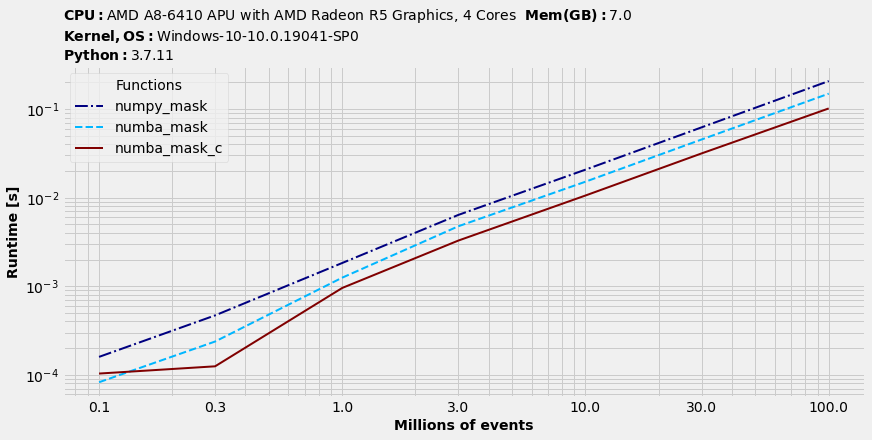

In [69]:
%matplotlib inline
benchit.setparams(rep=3)

sizes = [100000, 300000, 1000000, 3000000, 10000000, 30000000, 100000000]
N = sizes[-1]
arr = np.random.choice(np.array([-2147483648, 0]), p=[0.75, 0.25], size=(N,))
idx = arr==0
arr[idx] = np.random.randint(7000000, 8000000, size=np.sum(idx))


fns = [numpy_mask, numba_mask, numba_mask_c]
in_ = {s/1000000: (arr[:s],) for s in sizes}
t = benchit.timings(fns, in_, multivar=True, input_name='Millions of items')
t.plot(logx=True, figsize=(12, 6), fontsize=14)

### Palyginimui: Python su standartiniais built-in'ais

**Bent 10 milijonų narių pabandykim...**

In [9]:
N = 10000000
arr = np.random.choice(np.array([-2147483648, 0]), p=[0.75, 0.25], size=(N,))
idx = arr == 0
arr[idx] = np.random.randint(7000000, 8000000, size=np.sum(idx))

**Iteravimas per `numpy` masyvą:**

In [13]:
%%timeit -n 1 -r 1
[n == -2147483648 for n in arr]

6.08 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**Iteravimas per `list`:**

In [16]:
arr = arr.tolist()

In [17]:
%%timeit -n 1 -r 1
[n == -2147483648 for n in arr]

1.72 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
